In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
data = pd.read_csv('fruits.csv')

In [4]:
data

,weight,sweetness,label
0,180,7,Apple
1,200,6,Apple
2,150,4,Orange
3,170,5,Orange
4,160,6,Apple
5,140,3,Orange


In [19]:
new_fruit = (165,5.5)

In [6]:
def euclidean_dist(x,y):
    return np.sqrt((x[0] - y[0]) **2 + (x[1] - y[1]) **2)

In [7]:
def manhattan_dist(x,y):
    return sum(abs(a - b) for a , b in zip (x,y))

In [8]:
def minkowski_dist(x,y,p):
    return sum(abs(a - b ) ** p for a , b in zip (x , y)) ** (1/p)

In [9]:
#Testing 

point1 = (1, 8, 3)
point2 = (0, 5, 7)

distance1 = minkowski_dist(point1, point2,p=3)
distance2 = manhattan_dist(point1, point2)
distance3 = euclidean_dist(point1, point2)

print(f"Minkowski Distance: {distance1}")
print(f"Manhattan Distance: {distance2}")
print(f"Euclidean Distance: {distance3}")

Minkowski Distance: 4.514357435474001
Manhattan Distance: 8
Euclidean Distance: 3.1622776601683795


In [10]:
def knn_classify(new_fruit,data,k):
    distances = []
    
    for index ,row in data.iterrows():
        dist = euclidean_dist(new_fruit , ( row['weight'] , row['sweetness'] ))
        distances.append((dist,row['label']))
        
    distances.sort(key = lambda x:x[0])
    nearest_neighbors = distances[:k]
    
    vote_count = {}
    
    for dist , label in nearest_neighbors:
        if label in vote_count:
            vote_count[label] += 1
        else:
            vote_count[label] = 1
            
    predicted_label = max(vote_count, key= vote_count.get)
    return predicted_label

In [11]:
print("\t OUTPUT \n")
for k in [1,2,3]:
    predicted_label = knn_classify(new_fruit,data,k)
    print(f"Fruit Predicted For k = {k} is {predicted_label}.")

	 OUTPUT 

Fruit Predicted For k = 1 is Orange.
Fruit Predicted For k = 2 is Orange.
Fruit Predicted For k = 3 is Apple.


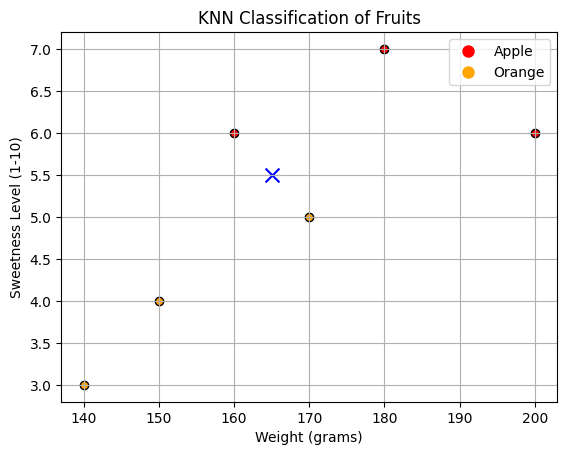

In [20]:
plt.figure()

for index,row in data.iterrows():
    color = 'red' if row['label'] == "Apple" else 'orange'
    plt.scatter(row['weight'] , row['sweetness'] , color = color , edgecolor = 'black')
    
plt.scatter(new_fruit[0], new_fruit[1],color = 'blue',marker='x',s=100,label='New Fruit')

legend = [
    Line2D([0], [0], marker='o', color='w', label='Apple', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Orange', markerfacecolor='orange', markersize=10),
]

plt.title('KNN Classification of Fruits')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level (1-10)')
plt.legend(handles=legend)
plt.grid(True)
plt.show()

In [16]:
legend = [
    Line2D([0], [0], marker='o', color='w', label='Apple', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Orange', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='x', color='blue', label='New Fruit', markersize=10, markeredgewidth=1.5,linestyle='None')
]

In [14]:
x_min, x_max = 130, 210  # Broad range for weights
y_min, y_max = 2, 8      # Broad range for sweetness
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = np.array([
    1 if knn_classify((x, y), data, k) == 'Apple' else 0
    for x, y in zip(X.ravel(), Y.ravel())
]).reshape(X.shape)


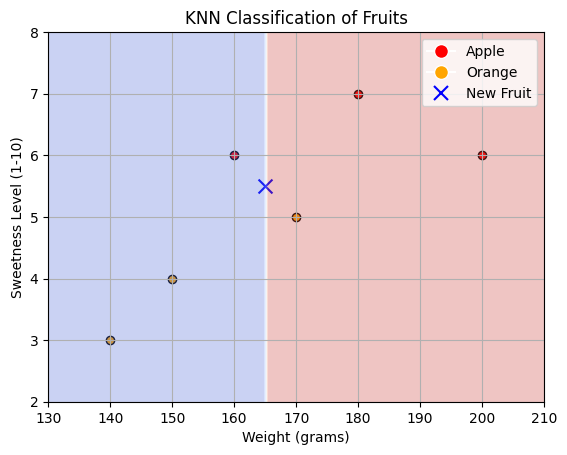

In [17]:
plt.figure()

for index, row in data.iterrows():
    color = 'red' if row['label'] == "Apple" else 'orange'
    plt.scatter(row['weight'], row['sweetness'], color=color, edgecolor='black')

plt.scatter(new_fruit[0], new_fruit[1], color='blue', marker='x', s=100, label='New Fruit')

plt.contourf(X, Y, Z, alpha=0.3, cmap='coolwarm') #optional

plt.legend(handles=legend)
plt.title('KNN Classification of Fruits')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level (1-10)')
plt.grid(True)
plt.show()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [22]:
data = pd.read_csv("fruits.csv")

In [23]:
data

,weight,sweetness,label
0,180,7,Apple
1,200,6,Apple
2,150,4,Orange
3,170,5,Orange
4,160,6,Apple
5,140,3,Orange


In [24]:
new_fruit = (165,5.5)

In [25]:
def euclidean_dist(x,y):
    return np.sqrt((x[0] - y[0]) **2 + (x[1] - y[1]) **2)

In [31]:
def knn_classify(new_fruit,data,k):
    distances = []
    for index,row in data.iterrows():
        dist = euclidean_dist(new_fruit,(row['weight'],row['sweetness']))
        distances.append((dist,row['label']))
        
    distances.sort(key=lambda x:x[0])
    nearest_neighbors = distances[:k]
    vote_count = {}
    for dist,label in nearest_neighbors:
        if label in vote_count:
            vote_count[label] += 1
        else:
            vote_count[label] = 1
    predicted_label = max(vote_count,key=vote_count.get)
    return predicted_label

In [32]:
for k in [1,2,3]:
    predicted_labell=knn_classify(new_fruit,data,k)
    print(predicted_labell)

Orange
Orange
Apple


C:\Users\arhaa\AppData\Local\Temp\ipykernel_6460\1270484497.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(new_fruit[0],new_fruit[1],marker='x',s=100,edgecolor='black')


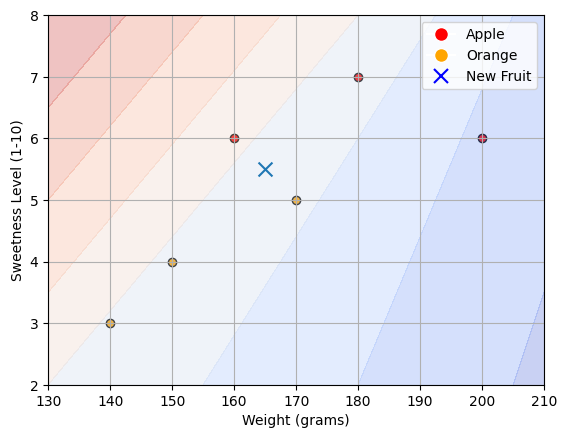

In [45]:
plt.figure()

for index,row in data.iterrows():
    color = 'red' if row['label'] == 'Apple' else 'orange'
    plt.scatter(row['weight'], row['sweetness'], color=color,edgecolor='black')
    
legend = [
    Line2D([0], [0], marker='o', color='w', label='Apple', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Orange', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='x', color='blue', label='New Fruit', markersize=10, markeredgewidth=1.5,linestyle='None')
]

plt.contourf((130,210),(2,8), ([100,20],[200,40]), alpha=0.3, cmap='coolwarm')
plt.legend(handles = legend)
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level (1-10)')    
plt.scatter(new_fruit[0],new_fruit[1],marker='x',s=100,edgecolor='black')
plt.grid(True)
plt.show()